# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset yang saya gunakan pada quiz membangun machine learning untuk pemula kali ini saya ambil dari kaggle dengan nama **spotify_dataset.csv**
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Dataset memiliki sekitar 20 ribu baris
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Artist,Track,Album, dan Album_type
     - *Numerikal*: Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_min,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream,EnergyLiveness, dan most_playedon

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.cluster import DBSCAN
from sklearn.feature_selection import VarianceThreshold
from scipy.stats import pointbiserialr, f_oneway

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [19]:
data = pd.read_csv('spotify_dataset.csv')
data

# Menampilkan ringkasan informasi dari dataset
data.info()

# Menampilkan statistik deskriptif dari dataset
data.describe(include="all")

# Memeriksa jumlah nilai yang hilang di setiap kolom
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

less = missing_values[missing_values < 1000].index
over = missing_values[missing_values >= 1000].index

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20594 entries, 0 to 20593
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20594 non-null  object 
 1   Track             20594 non-null  object 
 2   Album             20594 non-null  object 
 3   Album_type        20594 non-null  object 
 4   Danceability      20594 non-null  float64
 5   Energy            20594 non-null  float64
 6   Loudness          20594 non-null  float64
 7   Speechiness       20594 non-null  float64
 8   Acousticness      20594 non-null  float64
 9   Instrumentalness  20594 non-null  float64
 10  Liveness          20594 non-null  float64
 11  Valence           20594 non-null  float64
 12  Tempo             20594 non-null  float64
 13  Duration_min      20594 non-null  float64
 14  Title             20594 non-null  object 
 15  Channel           20594 non-null  object 
 16  Views             20594 non-null  float6

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.


--- Struktur Data ---
Jumlah baris dan kolom: (20594, 24)
Tipe data setiap kolom:
Artist               object
Track                object
Album                object
Album_type           object
Danceability        float64
Energy              float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_min        float64
Title                object
Channel              object
Views               float64
Likes               float64
Comments            float64
Licensed             object
official_video       object
Stream              float64
EnergyLiveness      float64
most_playedon        object
dtype: object

--- Lima Baris Pertama ---
     Artist                                          Track  \
0  Gorillaz                                 Feel Good Inc.   
1  Gorillaz                                Rhinestone Eyes   
2  Gorillaz  New 

<ipython-input-20-d9ce27e23c40>:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')  # Contoh: Mengisi dengan nilai sebelumnya


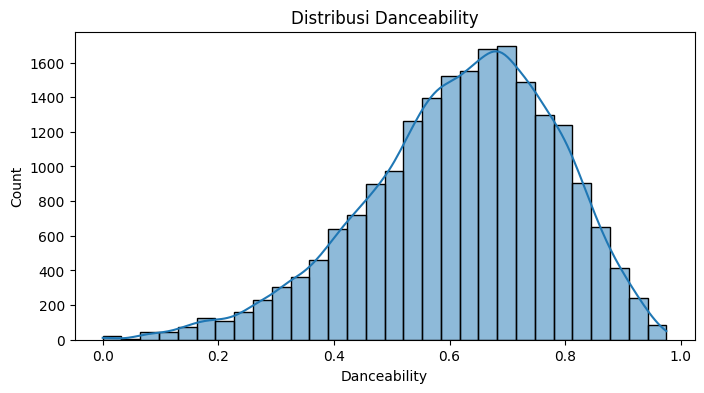

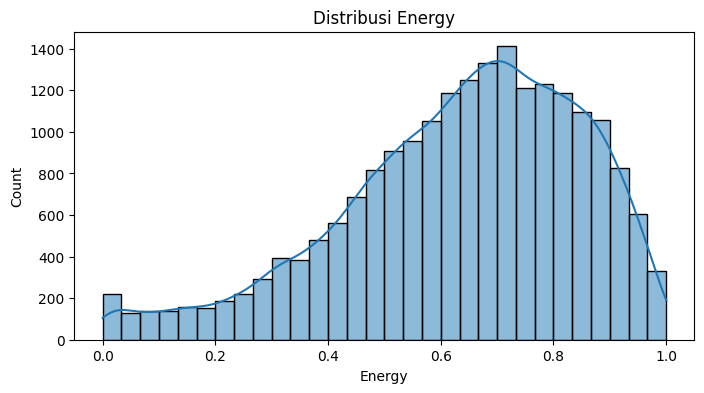

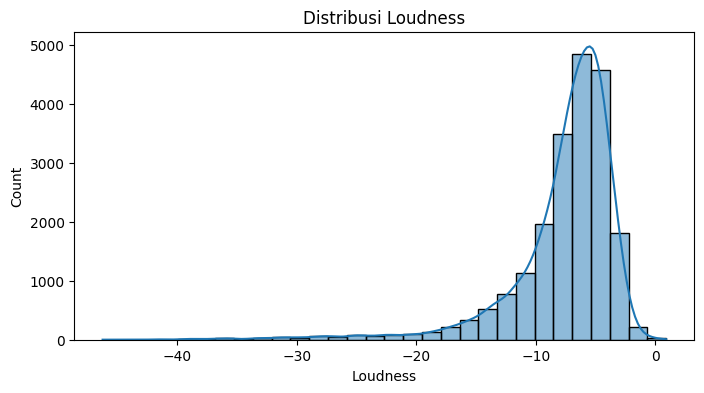

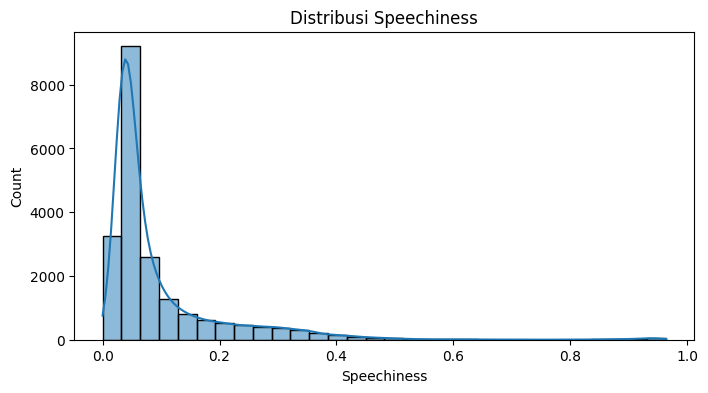

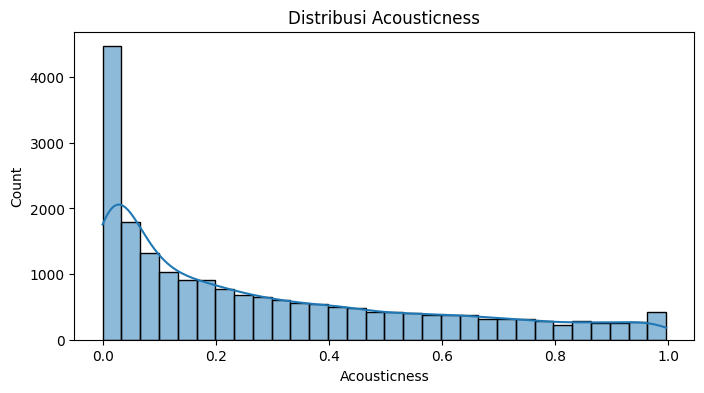

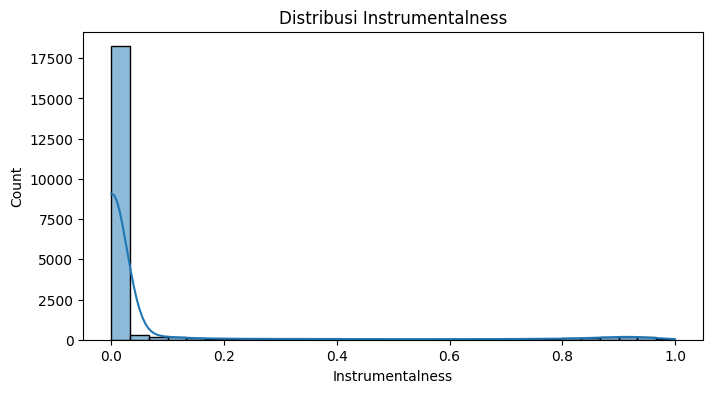

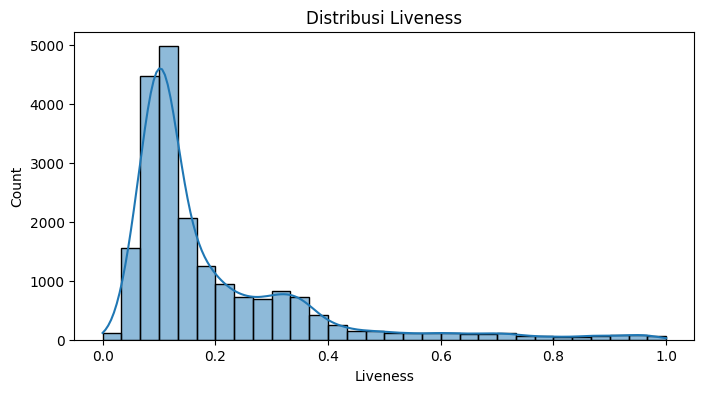

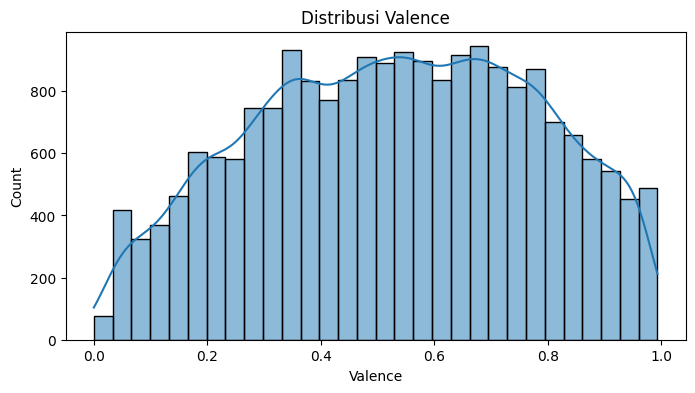

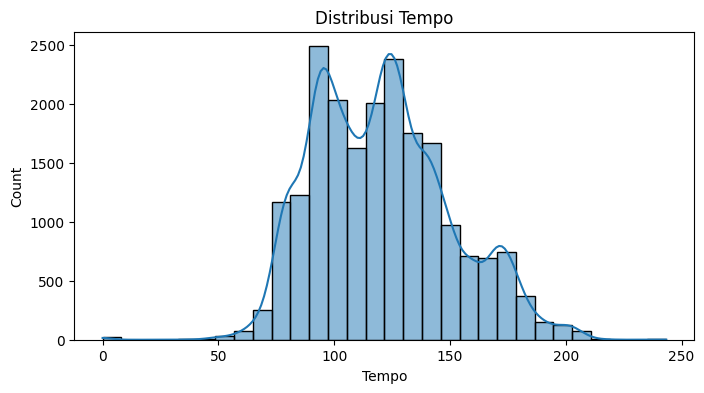

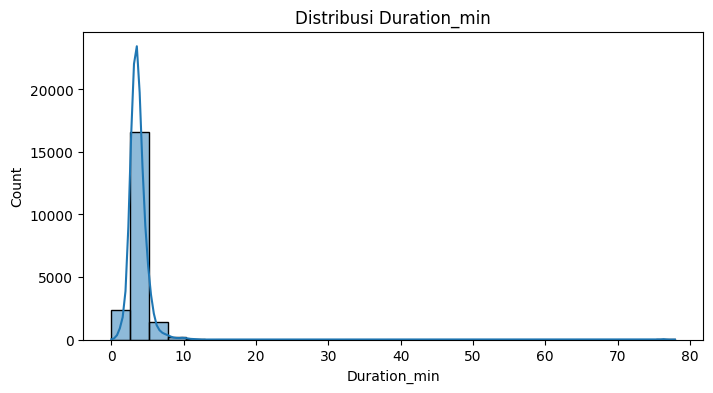

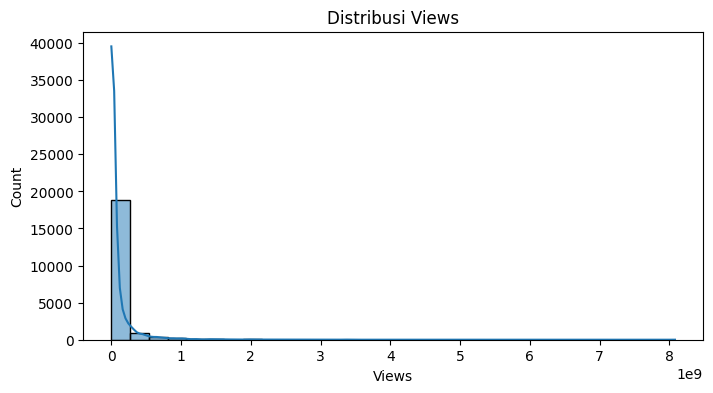

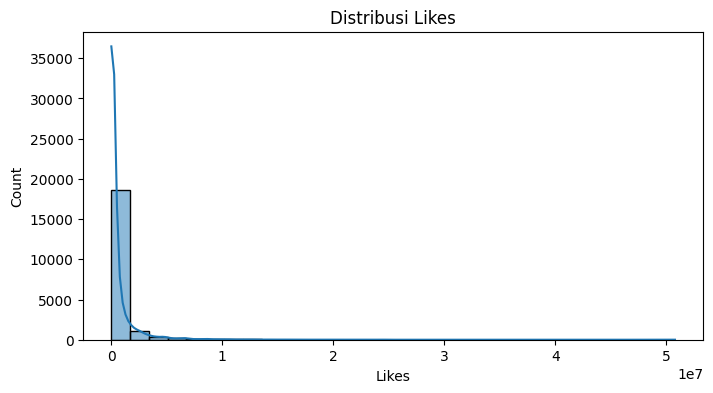

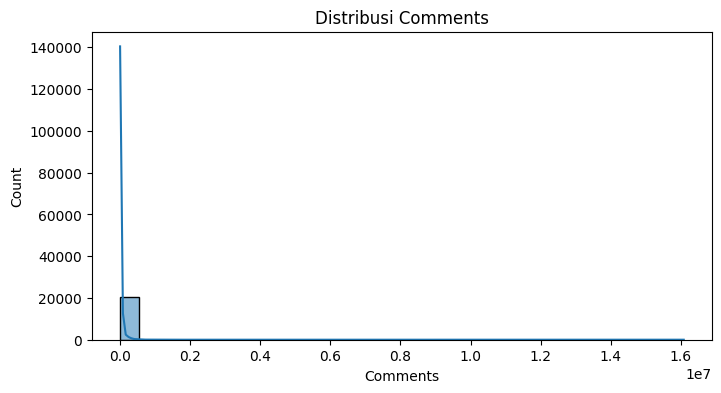

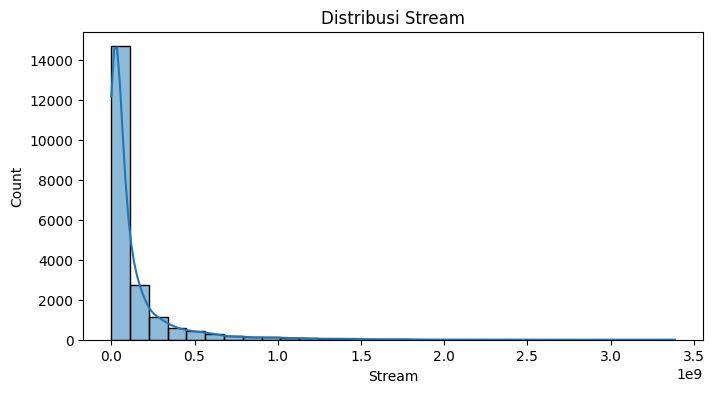

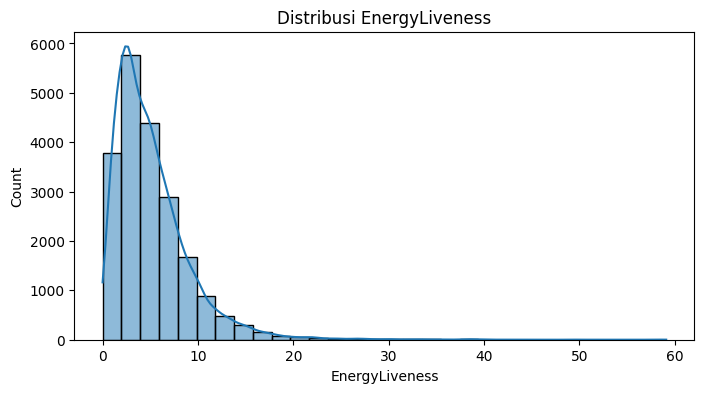

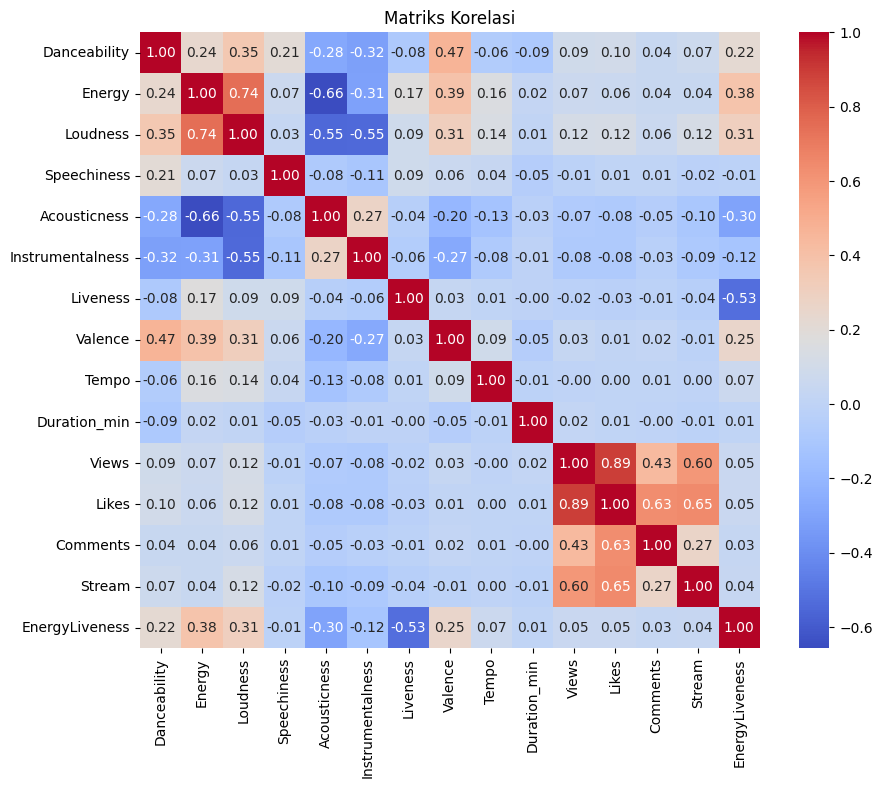

Kolom Artist memiliki terlalu banyak kategori untuk divisualisasikan.
Kolom Track memiliki terlalu banyak kategori untuk divisualisasikan.
Kolom Album memiliki terlalu banyak kategori untuk divisualisasikan.


<ipython-input-20-d9ce27e23c40>:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label.get_text().replace('$', '\\$') for label in ax.get_xticklabels()])


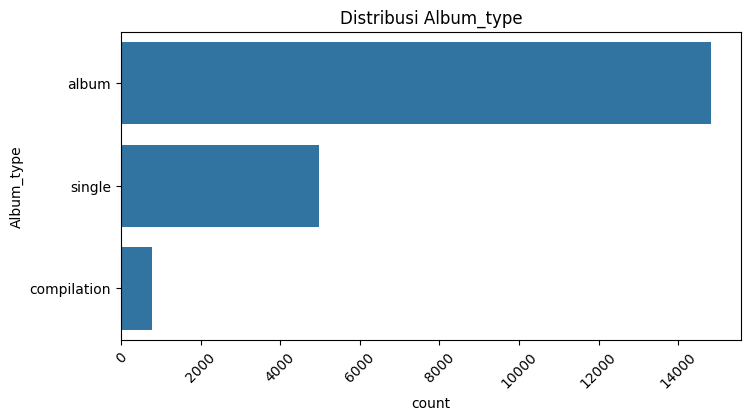

Kolom Title memiliki terlalu banyak kategori untuk divisualisasikan.
Kolom Channel memiliki terlalu banyak kategori untuk divisualisasikan.


<ipython-input-20-d9ce27e23c40>:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label.get_text().replace('$', '\\$') for label in ax.get_xticklabels()])


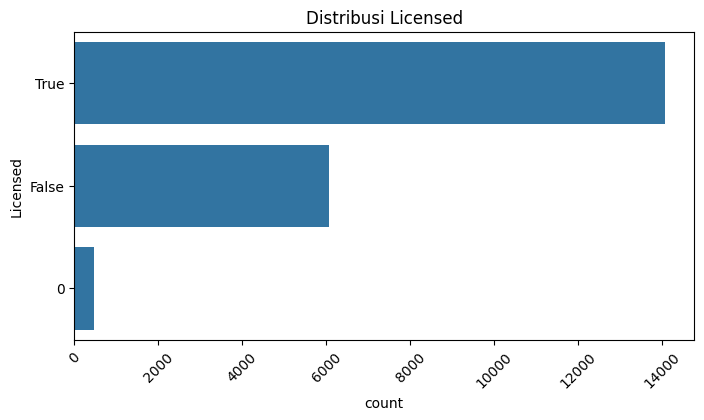

<ipython-input-20-d9ce27e23c40>:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label.get_text().replace('$', '\\$') for label in ax.get_xticklabels()])


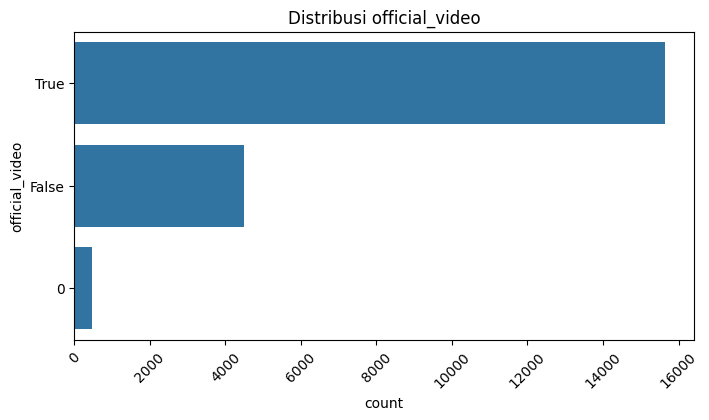

<ipython-input-20-d9ce27e23c40>:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label.get_text().replace('$', '\\$') for label in ax.get_xticklabels()])


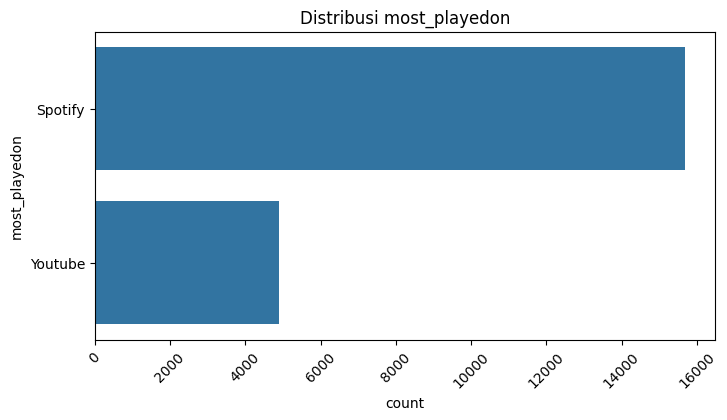

In [20]:
# 1. Memahami Struktur Data
print("\n--- Struktur Data ---")
print(f"Jumlah baris dan kolom: {data.shape}")
print(f"Tipe data setiap kolom:\n{data.dtypes}")
print("\n--- Lima Baris Pertama ---")
print(data.head())

# 2. Menangani Data yang Hilang
print("\n--- Data yang Hilang ---")
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
print(pd.DataFrame({'Jumlah Data Hilang': missing_values, 'Persentase': missing_percentage}))

# Opsional: Mengisi data hilang dengan nilai tertentu atau menghapus baris yang hilang
data = data.fillna(method='ffill')  # Contoh: Mengisi dengan nilai sebelumnya

# 3. Analisis Distribusi dan Korelasi
print("\n--- Statistik Deskriptif ---")
print(data.describe())

# Pisahkan kolom numerik dan kategorikal
numerical_columns = data.select_dtypes(include=[np.number]).columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Visualisasi distribusi variabel numerik
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribusi {col}")
    plt.show()

# Visualisasi korelasi
if len(numerical_columns) > 1:
    correlation_matrix = data[numerical_columns].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Matriks Korelasi')
    plt.show()

# Visualisasi variabel kategorikal
for col in categorical_columns:
    if data[col].nunique() <= 20:  # Batasi jumlah kategori yang divisualisasikan
        plt.figure(figsize=(8, 4))
        ax = sns.countplot(data[col], order=data[col].value_counts().index)
        plt.title(f"Distribusi {col}")
        plt.xticks(rotation=45)

        # Tangani simbol khusus dalam label
        ax.set_xticklabels([label.get_text().replace('$', '\\$') for label in ax.get_xticklabels()])
        plt.show()
    else:
        print(f"Kolom {col} memiliki terlalu banyak kategori untuk divisualisasikan.")


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.


--- Data Kosong Sebelum Penanganan ---
Series([], dtype: int64)

--- Data Kosong Setelah Penanganan ---
Artist              0
Track               0
Album               0
Album_type          0
Danceability        0
Energy              0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_min        0
Title               0
Channel             0
Views               0
Likes               0
Comments            0
Licensed            0
official_video      0
Stream              0
EnergyLiveness      0
most_playedon       0
dtype: int64

--- Jumlah Data Duplikat Sebelum ---
0

--- Jumlah Data Duplikat Setelah ---
0

--- Data Setelah Standarisasi ---
   Danceability    Energy  Loudness  Speechiness  Acousticness  \
0      1.195758  0.325870  0.215386     0.715524     -0.989238   
1      0.337753  0.316536  0.401618    -0.593096     -0.714728   
2      0.452557  1.343283  0.807923    -0

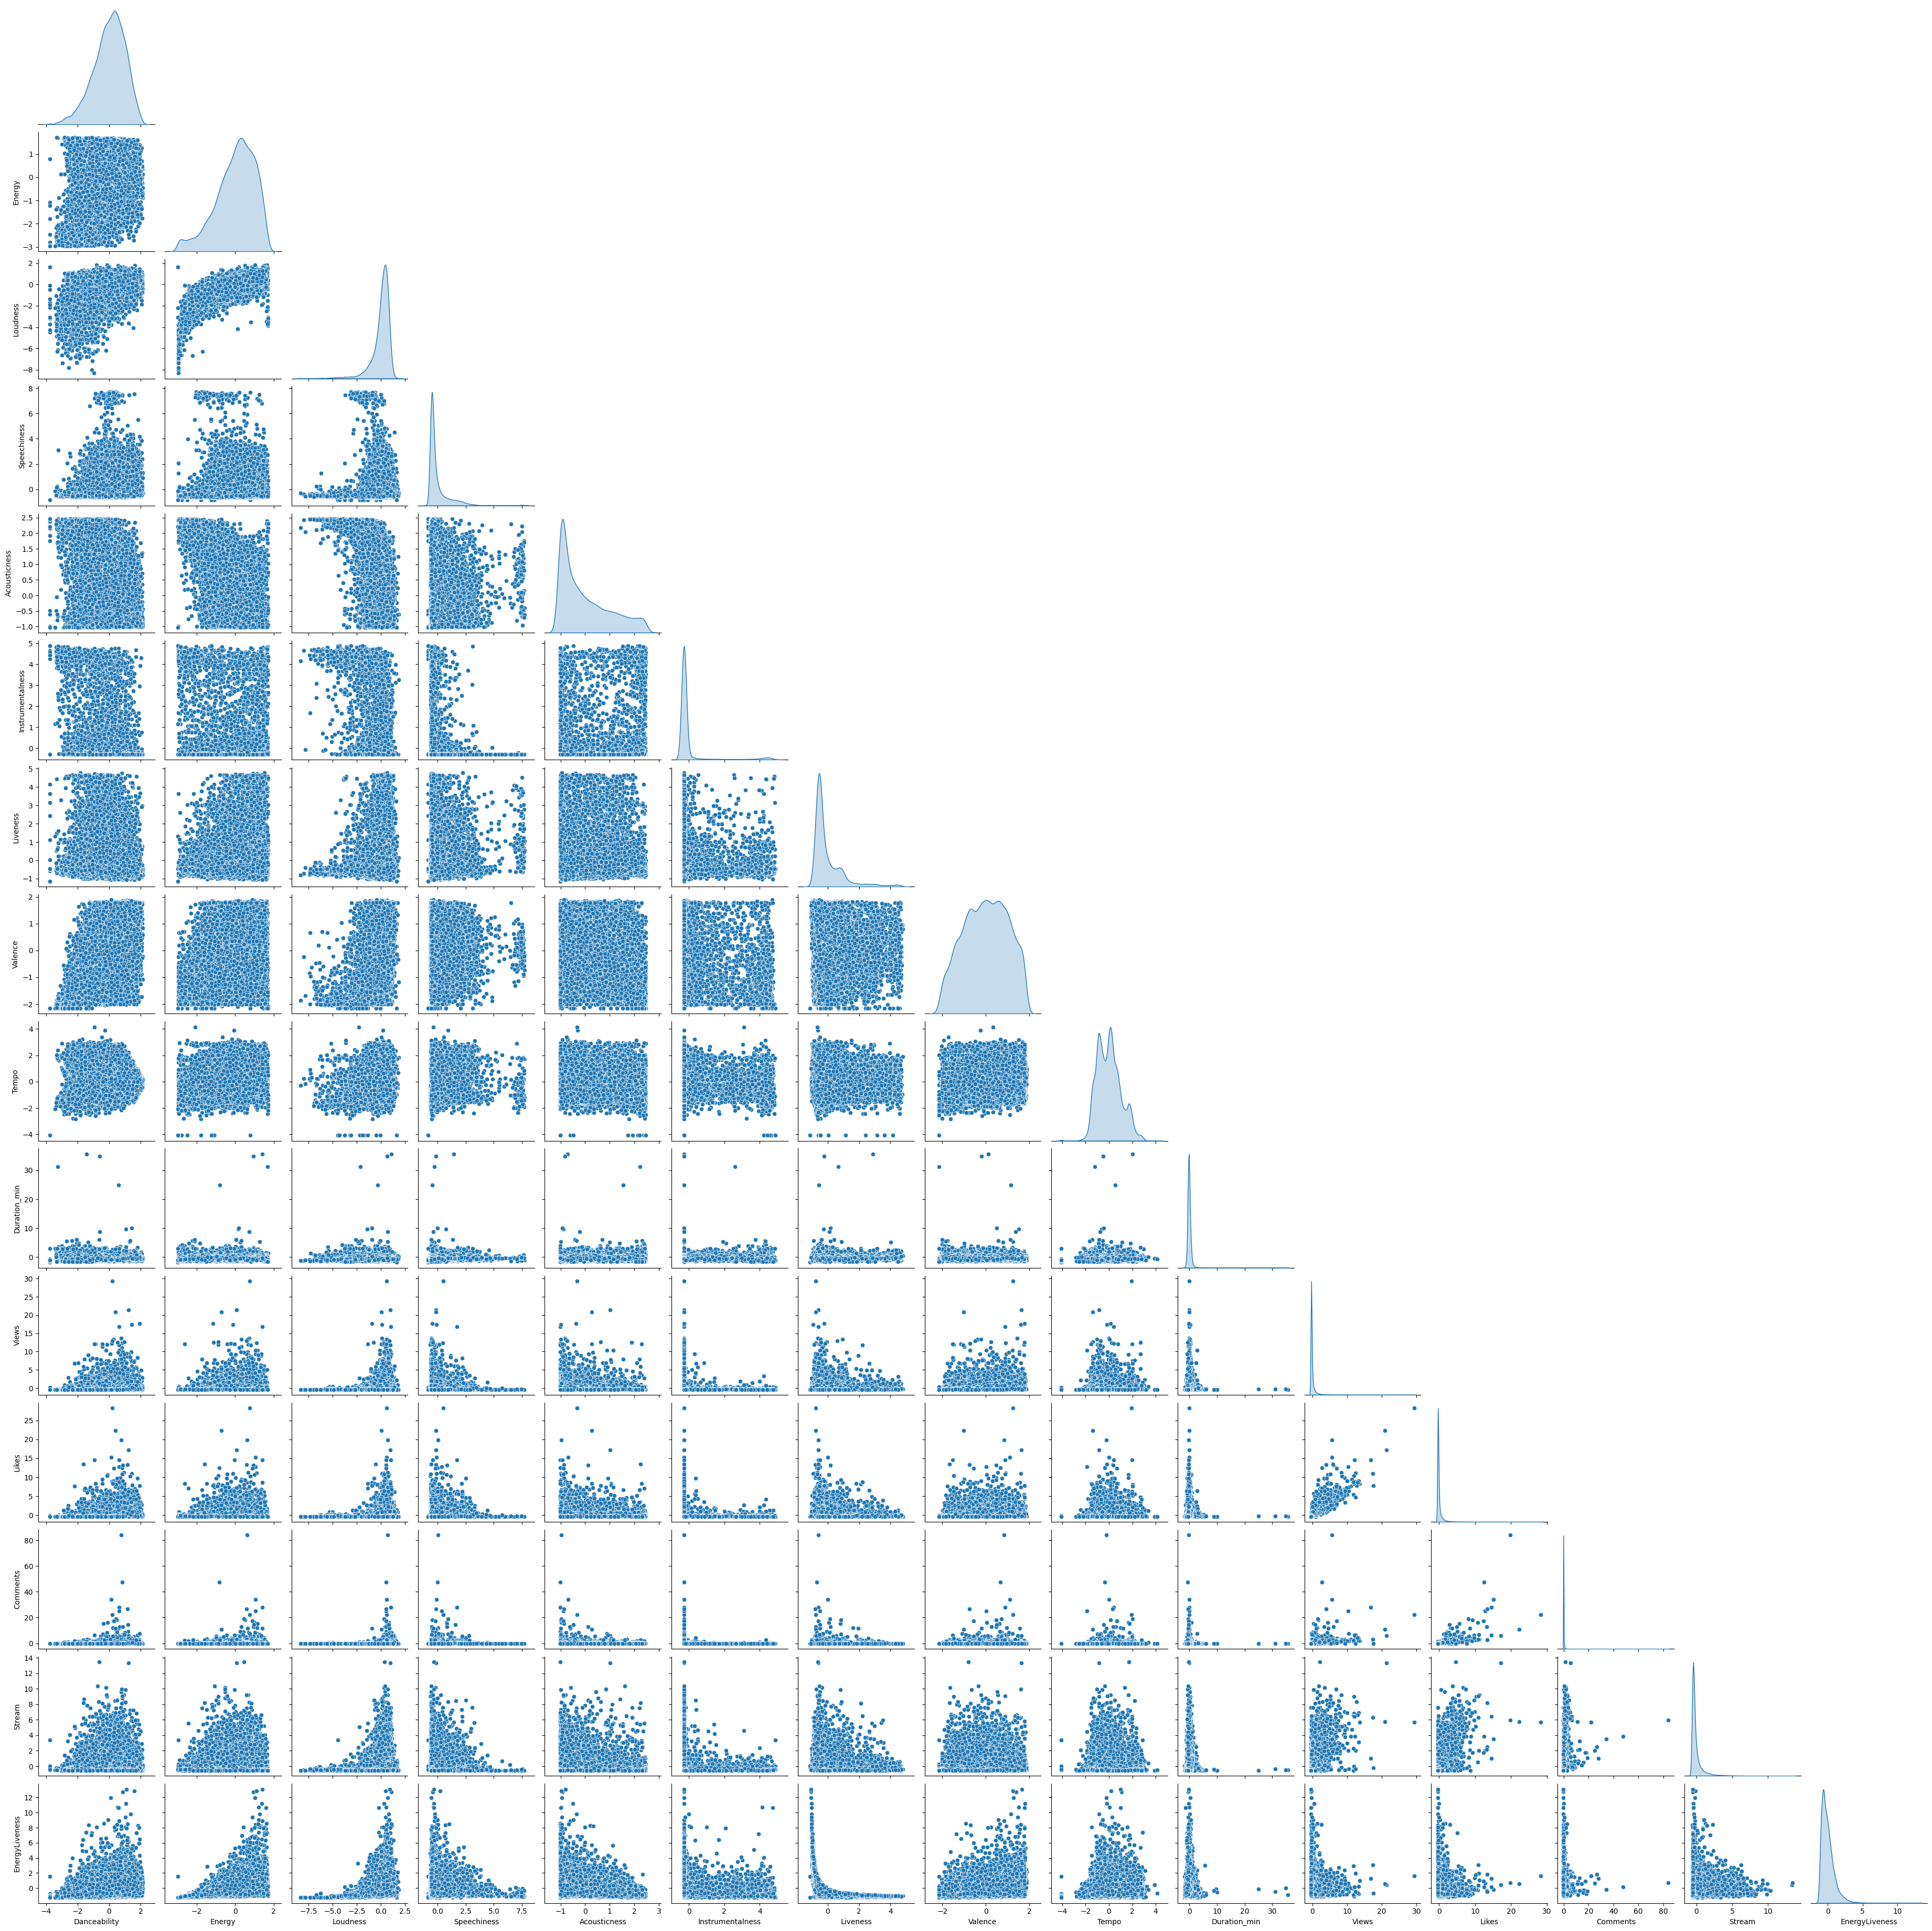

In [21]:
# 1. Menangani Data Kosong (Missing Values)
print("\n--- Data Kosong Sebelum Penanganan ---")
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

# Mengisi data kosong dengan median untuk kolom numerik
numerical_cols = data.select_dtypes(include=np.number).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

# Mengisi data kosong dengan modus untuk kolom kategorikal
categorical_cols = data.select_dtypes(include='object').columns
# Check if there are any categorical columns before filling missing values
if len(categorical_cols) > 0:
    data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

print("\n--- Data Kosong Setelah Penanganan ---")
print(data.isnull().sum())

# 2. Menghapus Data Duplikat
print("\n--- Jumlah Data Duplikat Sebelum ---")
print(data.duplicated().sum())
data = data.drop_duplicates()
print("\n--- Jumlah Data Duplikat Setelah ---")
print(data.duplicated().sum())

# 3. Normalisasi atau Standarisasi Fitur
# Data preprocessing: normalisasi fitur numerik
numerical_cols = data.select_dtypes(include='number').columns
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numerical_cols])
#Standarisasi menggunakan StandardScaler
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Alternatif: Normalisasi menggunakan MinMaxScaler
# scaler = MinMaxScaler()
# data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

print("\n--- Data Setelah Standarisasi ---")
print(data[numerical_cols].head())

# 4. Deteksi dan Penanganan Outlier
# Menggunakan IQR untuk mendeteksi outlier
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data[col] < lower_bound) | (data[col] > upper_bound)
    print(f"\nOutlier pada {col}: {outliers.sum()} ditemukan.")
    # Opsional: Tangani outlier (drop atau impute)
    # data = data[~outliers]

# 5. Encoding Data Kategorikal
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])
print("\n--- Data Setelah Encoding ---")
print(data[categorical_cols].head())

# 6. Binning (Pengelompokan Data)
# Contoh: Binning untuk kolom numerik (misal: Age)
if 'Age' in data.columns:
    data['Age_Group'] = pd.cut(data['Age'], bins=[0, 18, 35, 60, 100], labels=['Child', 'Youth', 'Adult', 'Senior'])
    print("\n--- Distribusi Age_Group ---")
    print(data['Age_Group'].value_counts())

# Visualisasi Data Setelah Preprocessing
sns.pairplot(data[numerical_cols], diag_kind='kde', corner=True)
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

Silhouette Score untuk DBSCAN: -0.13


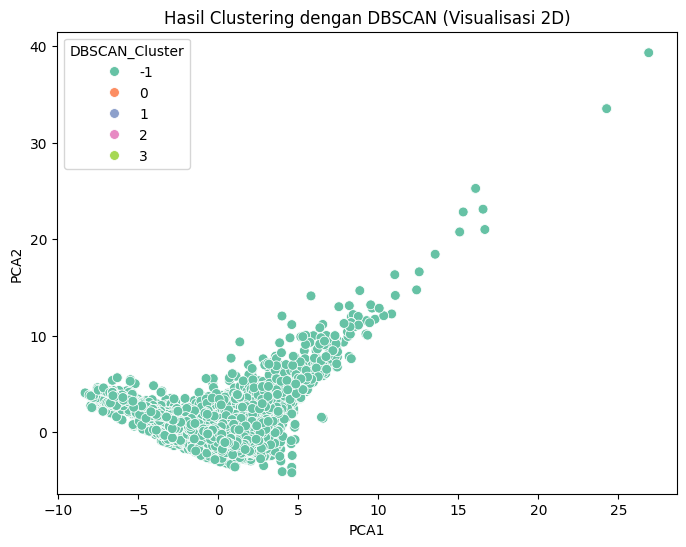


Jumlah data di setiap cluster:
DBSCAN_Cluster
-1    20557
 0       18
 2        9
 1        5
 3        5
Name: count, dtype: int64

Jumlah data yang dianggap outlier: 20557


In [22]:
# 1. Melatih model DBSCAN
# Parameter DBSCAN dapat disesuaikan (eps dan min_samples)
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Ubah nilai eps dan min_samples jika diperlukan
dbscan_labels = dbscan.fit_predict(data_scaled)

# 2. Menambahkan label cluster ke dataset
data['DBSCAN_Cluster'] = dbscan_labels

# 3. Evaluasi clustering dengan Silhouette Score
# Silhouette Score dihitung hanya jika ada lebih dari 1 cluster yang valid
if len(set(dbscan_labels)) > 1 and -1 in dbscan_labels:
    silhouette_avg = silhouette_score(data_scaled, dbscan_labels)
    print(f"Silhouette Score untuk DBSCAN: {silhouette_avg:.2f}")
else:
    print("Silhouette Score tidak dapat dihitung karena hanya terdapat 1 cluster atau semua data dianggap outlier.")

# 4. Visualisasi hasil clustering (PCA untuk dimensi 2D)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
data['PCA1'] = data_pca[:, 0]
data['PCA2'] = data_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='DBSCAN_Cluster', palette='Set2', data=data, s=50
)
plt.title('Hasil Clustering dengan DBSCAN (Visualisasi 2D)')
plt.show()

# 5. Analisis cluster
# Melihat distribusi data di setiap cluster (termasuk outlier)
cluster_counts = data['DBSCAN_Cluster'].value_counts()
print("\nJumlah data di setiap cluster:")
print(cluster_counts)

# Identifikasi data yang dianggap outlier
outliers = data[data['DBSCAN_Cluster'] == -1]
print(f"\nJumlah data yang dianggap outlier: {len(outliers)}")


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

Silhouette Score untuk DBSCAN: 0.45


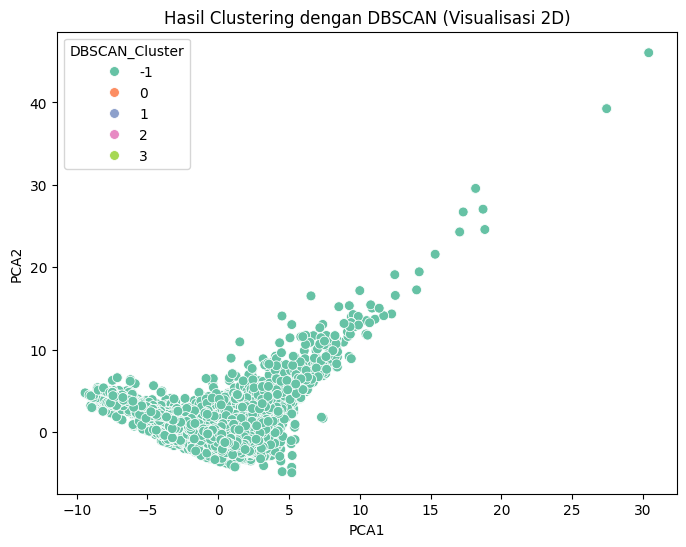


Jumlah data di setiap cluster:
DBSCAN_Cluster
-1    20557
 0       18
 2        9
 1        5
 3        5
Name: count, dtype: int64

Jumlah data yang dianggap outlier: 20557


In [23]:
# 1. Melatih model DBSCAN
# Parameter DBSCAN dapat disesuaikan (eps dan min_samples)
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Ubah nilai eps dan min_samples jika diperlukan
dbscan_labels = dbscan.fit_predict(data_scaled)

# 2. Menambahkan label cluster ke dataset
data['DBSCAN_Cluster'] = dbscan_labels

# 3. Evaluasi clustering dengan Silhouette Score
# Silhouette Score dihitung hanya jika ada lebih dari 1 cluster yang valid
if len(set(dbscan_labels)) > 1 and -1 in dbscan_labels:
    silhouette_avg = silhouette_score(data_scaled, dbscan_labels)
    print(f"Silhouette Score untuk DBSCAN: {silhouette_avg:.2f}")
else:
    print("Silhouette Score tidak dapat dihitung karena hanya terdapat 1 cluster atau semua data dianggap outlier.")

# 4. Visualisasi hasil clustering (PCA untuk dimensi 2D)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
data['PCA1'] = data_pca[:, 0]
data['PCA2'] = data_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='DBSCAN_Cluster', palette='Set2', data=data, s=50
)
plt.title('Hasil Clustering dengan DBSCAN (Visualisasi 2D)')
plt.show()

# 5. Analisis cluster
# Melihat distribusi data di setiap cluster (termasuk outlier)
cluster_counts = data['DBSCAN_Cluster'].value_counts()
print("\nJumlah data di setiap cluster:")
print(cluster_counts)

# Identifikasi data yang dianggap outlier
outliers = data[data['DBSCAN_Cluster'] == -1]
print(f"\nJumlah data yang dianggap outlier: {len(outliers)}")


## **c. Feature Selection (Opsional)**

---



Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

Silhouette Score untuk DBSCAN dengan Feature Selection: 0.45


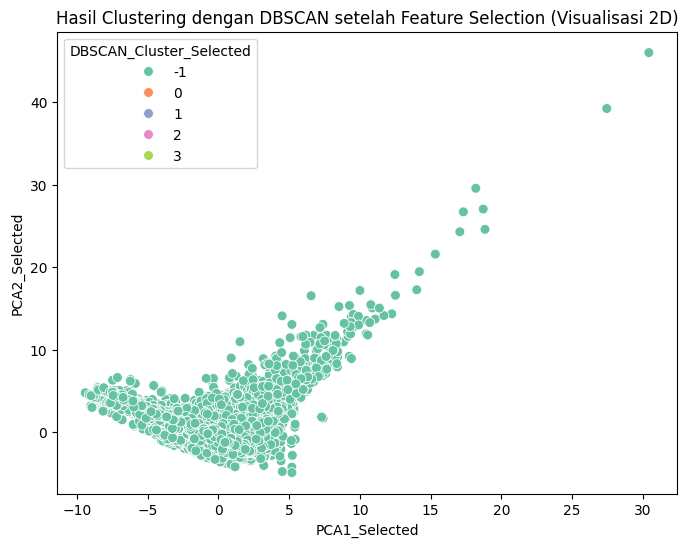


Jumlah data di setiap cluster setelah feature selection:
DBSCAN_Cluster_Selected
-1    20557
 0       18
 2        9
 1        5
 3        5
Name: count, dtype: int64

Jumlah data yang dianggap outlier setelah feature selection: 20557

Silhouette Score untuk DBSCAN sebelum Feature Selection: 0.45


In [24]:
# 1. Feature Selection menggunakan VarianceThreshold (menghapus fitur dengan variansi rendah)
selector = VarianceThreshold(threshold=0.1)  # Menentukan ambang batas variansi
data_selected = selector.fit_transform(data_scaled)

# 2. Melatih model DBSCAN dengan data yang sudah diseleksi
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels_selected = dbscan.fit_predict(data_selected)

# 3. Menambahkan label cluster ke dataset yang telah diseleksi
data['DBSCAN_Cluster_Selected'] = dbscan_labels_selected

# 4. Evaluasi clustering dengan Silhouette Score untuk data yang telah diseleksi
if len(set(dbscan_labels_selected)) > 1 and -1 in dbscan_labels_selected:
    silhouette_avg_selected = silhouette_score(data_selected, dbscan_labels_selected)
    print(f"Silhouette Score untuk DBSCAN dengan Feature Selection: {silhouette_avg_selected:.2f}")
else:
    print("Silhouette Score tidak dapat dihitung karena hanya terdapat 1 cluster atau semua data dianggap outlier.")

# 5. Visualisasi hasil clustering dengan PCA (data yang telah diseleksi)
pca = PCA(n_components=2)
data_pca_selected = pca.fit_transform(data_selected)
data['PCA1_Selected'] = data_pca_selected[:, 0]
data['PCA2_Selected'] = data_pca_selected[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='PCA1_Selected', y='PCA2_Selected', hue='DBSCAN_Cluster_Selected', palette='Set2', data=data, s=50
)
plt.title('Hasil Clustering dengan DBSCAN setelah Feature Selection (Visualisasi 2D)')
plt.show()

# 6. Analisis cluster (data yang telah diseleksi)
cluster_counts_selected = data['DBSCAN_Cluster_Selected'].value_counts()
print("\nJumlah data di setiap cluster setelah feature selection:")
print(cluster_counts_selected)

# Identifikasi data yang dianggap outlier
outliers_selected = data[data['DBSCAN_Cluster_Selected'] == -1]
print(f"\nJumlah data yang dianggap outlier setelah feature selection: {len(outliers_selected)}")

# **Perbandingan dengan model sebelum feature selection** (untuk analisis perbandingan):
# 1. Hasil clustering menggunakan seluruh fitur:
dbscan_labels_full = dbscan.fit_predict(data_scaled)
silhouette_avg_full = silhouette_score(data_scaled, dbscan_labels_full)
print(f"\nSilhouette Score untuk DBSCAN sebelum Feature Selection: {silhouette_avg_full:.2f}")


### Permodelan clustering sebelum dan sesudah feature enginering

Silhouette Score untuk DBSCAN sebelum Feature Engineering: 0.57


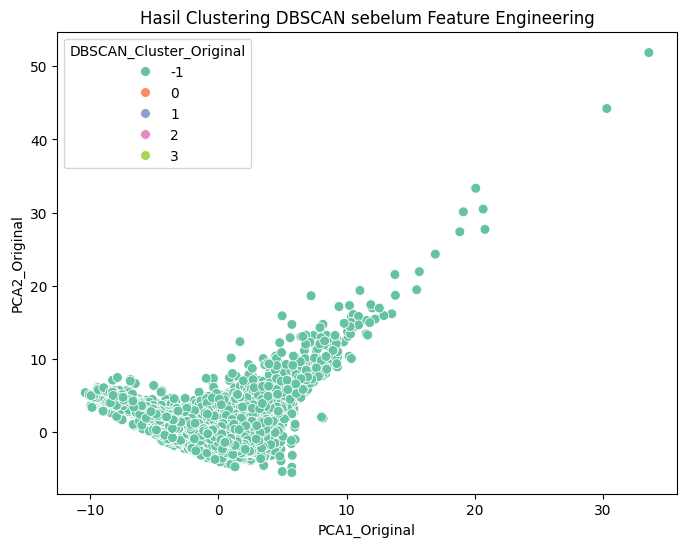

Silhouette Score untuk DBSCAN setelah Feature Engineering: 0.57


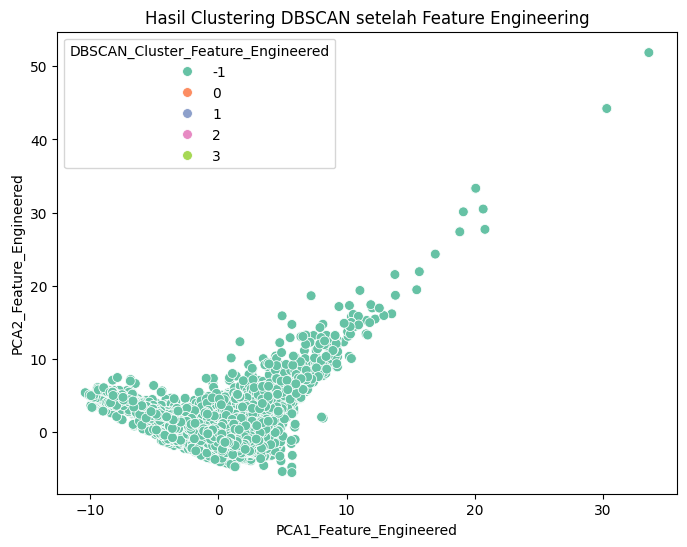


Perbandingan Hasil Clustering:
Cluster sebelum Feature Engineering:
DBSCAN_Cluster_Original
-1    20557
 0       18
 2        9
 1        5
 3        5
Name: count, dtype: int64
Jumlah outlier sebelum Feature Engineering: 20557

Cluster setelah Feature Engineering:
DBSCAN_Cluster_Feature_Engineered
-1    20557
 0       18
 2        9
 1        5
 3        5
Name: count, dtype: int64
Jumlah outlier setelah Feature Engineering: 20557

Silhouette Score sebelum Feature Engineering: 0.57
Silhouette Score setelah Feature Engineering: 0.57


In [25]:
# 1. Sebelum Feature Engineering
# Data preprocessing: normalisasi fitur numerik
numerical_cols = data.select_dtypes(include='number').columns
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numerical_cols])

# 1.1. Melatih model DBSCAN dengan data asli
dbscan_original = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels_original = dbscan_original.fit_predict(data_scaled)

# 1.2. Menambahkan label cluster ke dataset yang belum diproses
data['DBSCAN_Cluster_Original'] = dbscan_labels_original

# 1.3. Evaluasi clustering dengan Silhouette Score untuk data asli
if len(set(dbscan_labels_original)) > 1 and -1 in dbscan_labels_original:
    silhouette_avg_original = silhouette_score(data_scaled, dbscan_labels_original)
    print(f"Silhouette Score untuk DBSCAN sebelum Feature Engineering: {silhouette_avg_original:.2f}")
else:
    print("Silhouette Score tidak dapat dihitung karena hanya terdapat 1 cluster atau semua data dianggap outlier.")

# 1.4. Visualisasi hasil clustering sebelum feature engineering
pca = PCA(n_components=2)
data_pca_original = pca.fit_transform(data_scaled)
data['PCA1_Original'] = data_pca_original[:, 0]
data['PCA2_Original'] = data_pca_original[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='PCA1_Original', y='PCA2_Original', hue='DBSCAN_Cluster_Original', palette='Set2', data=data, s=50
)
plt.title('Hasil Clustering DBSCAN sebelum Feature Engineering')
plt.show()

# 2. Sesudah Feature Engineering

# 2.1. Feature Engineering: Menggunakan VarianceThreshold untuk feature selection
selector = VarianceThreshold(threshold=0.1)  # Menghapus fitur dengan variansi rendah
data_selected = selector.fit_transform(data_scaled)

# 2.2. Melatih model DBSCAN dengan data yang telah diproses
dbscan_feature_engineered = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels_feature_engineered = dbscan_feature_engineered.fit_predict(data_selected)

# 2.3. Menambahkan label cluster ke dataset yang telah diproses
data['DBSCAN_Cluster_Feature_Engineered'] = dbscan_labels_feature_engineered

# 2.4. Evaluasi clustering dengan Silhouette Score untuk data setelah feature engineering
if len(set(dbscan_labels_feature_engineered)) > 1 and -1 in dbscan_labels_feature_engineered:
    silhouette_avg_feature_engineered = silhouette_score(data_selected, dbscan_labels_feature_engineered)
    print(f"Silhouette Score untuk DBSCAN setelah Feature Engineering: {silhouette_avg_feature_engineered:.2f}")
else:
    print("Silhouette Score tidak dapat dihitung karena hanya terdapat 1 cluster atau semua data dianggap outlier.")

# 2.5. Visualisasi hasil clustering setelah feature engineering
data_pca_feature_engineered = pca.fit_transform(data_selected)
data['PCA1_Feature_Engineered'] = data_pca_feature_engineered[:, 0]
data['PCA2_Feature_Engineered'] = data_pca_feature_engineered[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='PCA1_Feature_Engineered', y='PCA2_Feature_Engineered', hue='DBSCAN_Cluster_Feature_Engineered', palette='Set2', data=data, s=50
)
plt.title('Hasil Clustering DBSCAN setelah Feature Engineering')
plt.show()

# 3. Perbandingan Hasil Clustering
# Menampilkan perbandingan jumlah cluster dan outlier
print("\nPerbandingan Hasil Clustering:")
print("Cluster sebelum Feature Engineering:")
print(data['DBSCAN_Cluster_Original'].value_counts())
print(f"Jumlah outlier sebelum Feature Engineering: {len(data[data['DBSCAN_Cluster_Original'] == -1])}")

print("\nCluster setelah Feature Engineering:")
print(data['DBSCAN_Cluster_Feature_Engineered'].value_counts())
print(f"Jumlah outlier setelah Feature Engineering: {len(data[data['DBSCAN_Cluster_Feature_Engineered'] == -1])}")

# Bandingkan Silhouette Score
print(f"\nSilhouette Score sebelum Feature Engineering: {silhouette_avg_original:.2f}")
print(f"Silhouette Score setelah Feature Engineering: {silhouette_avg_feature_engineered:.2f}")


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

Silhouette Score untuk DBSCAN sebelum Feature Engineering: 0.67


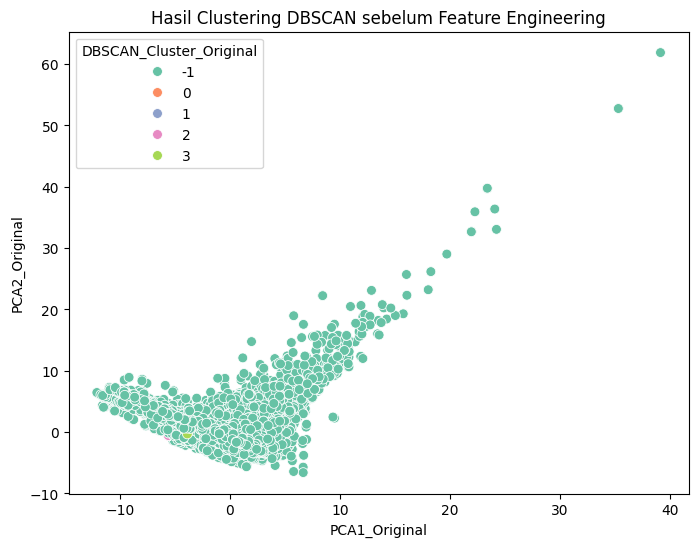

Silhouette Score untuk DBSCAN setelah Feature Engineering: 0.67


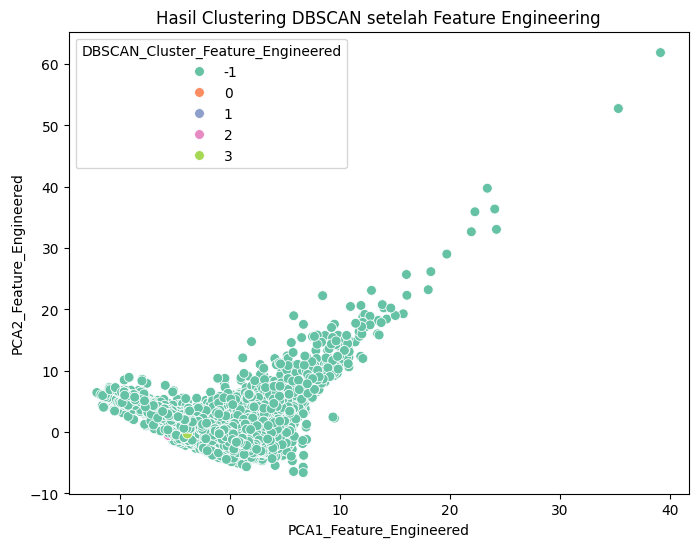

In [26]:
# 1. Sebelum Feature Engineering

# Data preprocessing: normalisasi fitur numerik
numerical_cols = data.select_dtypes(include='number').columns
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numerical_cols])

# 1.1. Melatih model DBSCAN dengan data asli
dbscan_original = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels_original = dbscan_original.fit_predict(data_scaled)

# 1.2. Menambahkan label cluster ke dataset yang belum diproses
data['DBSCAN_Cluster_Original'] = dbscan_labels_original

# 1.3. Evaluasi clustering dengan Silhouette Score untuk data asli
if len(set(dbscan_labels_original)) > 1 and -1 in dbscan_labels_original:
    silhouette_avg_original = silhouette_score(data_scaled, dbscan_labels_original)
    print(f"Silhouette Score untuk DBSCAN sebelum Feature Engineering: {silhouette_avg_original:.2f}")
else:
    print("Silhouette Score tidak dapat dihitung karena hanya terdapat 1 cluster atau semua data dianggap outlier.")

# 1.4. Visualisasi hasil clustering sebelum feature engineering
pca = PCA(n_components=2)
data_pca_original = pca.fit_transform(data_scaled)
data['PCA1_Original'] = data_pca_original[:, 0]
data['PCA2_Original'] = data_pca_original[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='PCA1_Original', y='PCA2_Original', hue='DBSCAN_Cluster_Original', palette='Set2', data=data, s=50
)
plt.title('Hasil Clustering DBSCAN sebelum Feature Engineering')
plt.show()

# 2. Sesudah Feature Engineering

# 2.1. Feature Engineering: Menggunakan VarianceThreshold untuk feature selection
selector = VarianceThreshold(threshold=0.1)  # Menghapus fitur dengan variansi rendah
data_selected = selector.fit_transform(data_scaled)

# 2.2. Melatih model DBSCAN dengan data yang telah diproses
dbscan_feature_engineered = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels_feature_engineered = dbscan_feature_engineered.fit_predict(data_selected)

# 2.3. Menambahkan label cluster ke dataset yang telah diproses
data['DBSCAN_Cluster_Feature_Engineered'] = dbscan_labels_feature_engineered

# 2.4. Evaluasi clustering dengan Silhouette Score untuk data setelah feature engineering
if len(set(dbscan_labels_feature_engineered)) > 1 and -1 in dbscan_labels_feature_engineered:
    silhouette_avg_feature_engineered = silhouette_score(data_selected, dbscan_labels_feature_engineered)
    print(f"Silhouette Score untuk DBSCAN setelah Feature Engineering: {silhouette_avg_feature_engineered:.2f}")
else:
    print("Silhouette Score tidak dapat dihitung karena hanya terdapat 1 cluster atau semua data dianggap outlier.")

# 2.5. Visualisasi hasil clustering setelah feature engineering
data_pca_feature_engineered = pca.fit_transform(data_selected)
data['PCA1_Feature_Engineered'] = data_pca_feature_engineered[:, 0]
data['PCA2_Feature_Engineered'] = data_pca_feature_engineered[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='PCA1_Feature_Engineered', y='PCA2_Feature_Engineered', hue='DBSCAN_Cluster_Feature_Engineered', palette='Set2', data=data, s=50
)
plt.title('Hasil Clustering DBSCAN setelah Feature Engineering')
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

### 1.Statistik Deskriptif per Cluster

In [27]:
# Statistik Deskriptif setelah Feature Engineering
# Menyaring data berdasarkan cluster yang dihasilkan oleh DBSCAN setelah feature engineering
cluster_stats_feature_engineered = data.groupby('DBSCAN_Cluster_Feature_Engineered').describe().T

# Menampilkan statistik deskriptif untuk setiap cluster setelah feature engineering
print("Statistik Deskriptif per Cluster setelah Feature Engineering:")
print(cluster_stats_feature_engineered)


Statistik Deskriptif per Cluster setelah Feature Engineering:
DBSCAN_Cluster_Feature_Engineered            -1           0           1  \
Artist                  count      20557.000000   18.000000    5.000000   
                        mean        1036.040230  947.166667  778.200000   
                        std          598.550584  525.566613  173.417704   
                        min            0.000000  294.000000  561.000000   
                        25%          517.000000  508.250000  661.000000   
...                                         ...         ...         ...   
PCA2_Feature_Engineered min           -6.608049   -2.644381   -0.772068   
                        25%           -1.502453   -2.634875   -0.768211   
                        50%           -0.513581   -2.620203   -0.766814   
                        75%            0.854805   -2.610916   -0.763112   
                        max           61.868240   -2.605371   -0.760523   

DBSCAN_Cluster_Feature_Engineered    

### 2. Distribusi Nilai dalam Cluster

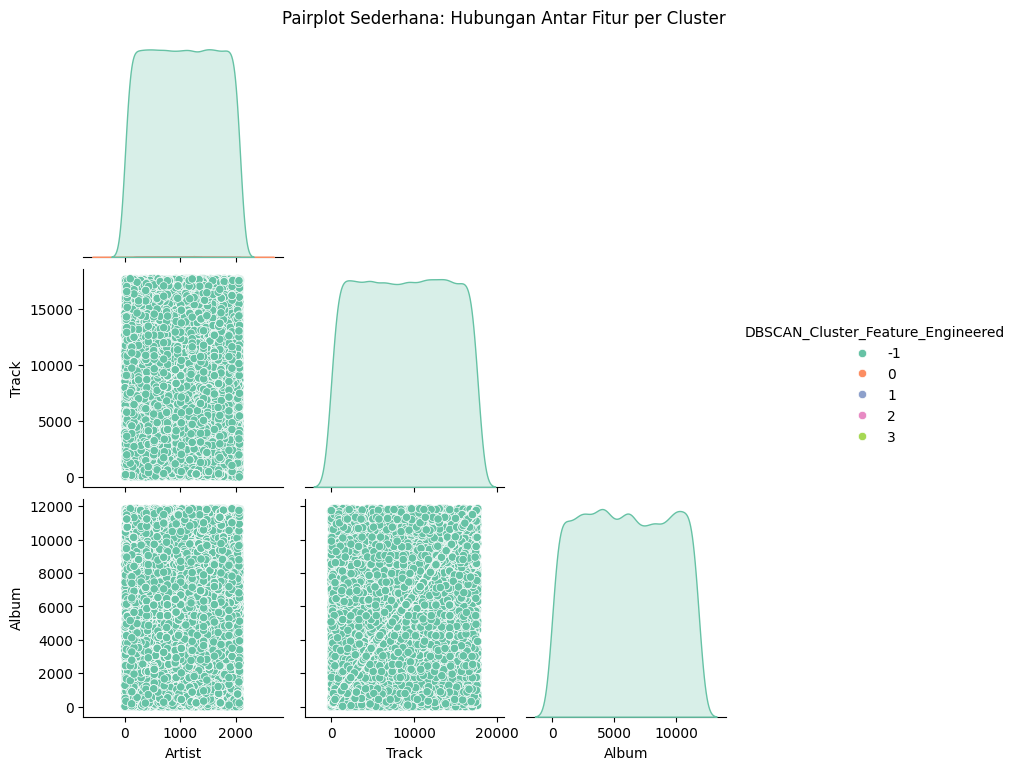

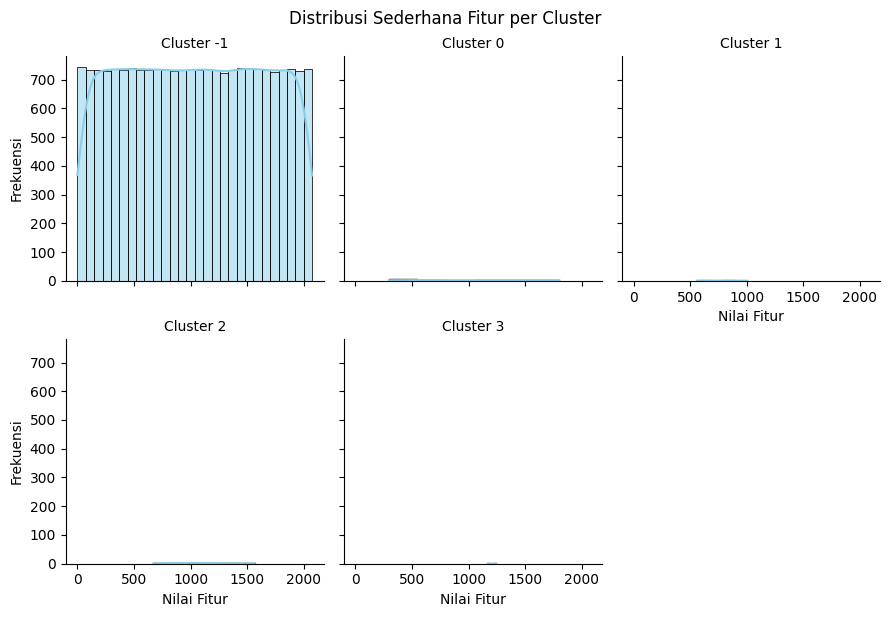

In [28]:
# Memilih beberapa fitur numerik utama untuk visualisasi
selected_features = data.select_dtypes(include='number').columns[:3]  # Ambil 3 fitur pertama

# 1. Visualisasi Pairplot yang Sederhana
if 'DBSCAN_Cluster_Feature_Engineered' in data.columns:
    sns.pairplot(
        data,
        hue='DBSCAN_Cluster_Feature_Engineered',
        vars=selected_features,
        palette='Set2',
        corner=True  # Hanya tampilkan bagian bawah untuk mengurangi plot
    )
    plt.suptitle('Pairplot Sederhana: Hubungan Antar Fitur per Cluster', y=1.02)
    plt.show()
else:
    print("Kolom 'DBSCAN_Cluster_Feature_Engineered' tidak ditemukan di DataFrame.")

# 2. Visualisasi FacetGrid Sederhana
if 'DBSCAN_Cluster_Feature_Engineered' in data.columns:
    g = sns.FacetGrid(
        data,
        col='DBSCAN_Cluster_Feature_Engineered',
        col_wrap=3,  # Kurangi jumlah subplot dalam satu baris
        height=3
    )
    # Hanya menggunakan fitur numerik pertama
    g.map(sns.histplot, selected_features[0], kde=True, color='skyblue')

    # Setel label dan judul
    g.set_axis_labels('Nilai Fitur', 'Frekuensi')
    g.set_titles('Cluster {col_name}')
    g.tight_layout()

    # Menambahkan judul utama
    plt.suptitle('Distribusi Sederhana Fitur per Cluster', y=1.02)
    plt.show()
else:
    print("Kolom 'DBSCAN_Cluster_Feature_Engineered' tidak ditemukan di DataFrame.")


### 3.Analisis Korelasi antara Fitur dan Cluster


Korelasi Point-Biserial antara Fitur dan Cluster:
                                   Point-Biserial Correlation
Artist                                              -0.000060
Track                                               -0.010034
Album                                               -0.004103
Album_type                                           0.058283
Danceability                                        -0.037417
Energy                                              -0.005200
Loudness                                            -0.001875
Speechiness                                          0.014532
Acousticness                                         0.009612
Instrumentalness                                    -0.007971
Liveness                                             0.011067
Valence                                             -0.023173
Tempo                                                0.000630
Duration_min                                         0.030396
Title              

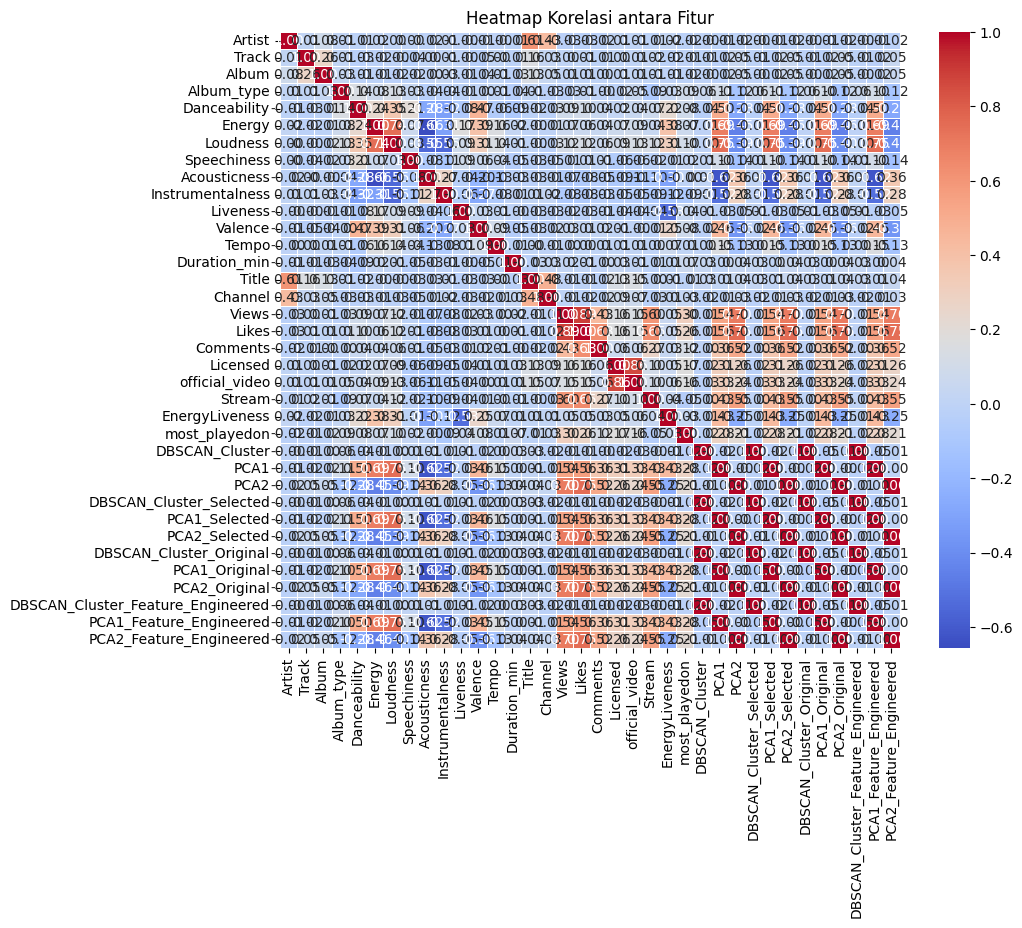


Hasil ANOVA per Fitur:
                                   F-statistic       p-value
Artist                                0.443402  7.773053e-01
Track                                 9.144691  2.231808e-07
Album                                10.931358  7.472361e-09
Album_type                           24.426102  3.385394e-20
Danceability                         11.670924  1.818233e-09
Energy                                4.978833  5.210356e-04
Loudness                              0.108513  9.795938e-01
Speechiness                           6.065248  7.123656e-05
Acousticness                          5.054856  4.538129e-04
Instrumentalness                      0.766895  5.465935e-01
Liveness                             21.475050  1.064155e-17
Valence                              10.841278  8.873754e-09
Tempo                                15.042936  2.781405e-12
Duration_min                         14.726599  5.120773e-12
Title                                14.183452  1.459005e-11


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


In [29]:
# 1. Korelasi Point-Biserial

# Korelasi antara setiap fitur numerik dan label cluster (DBSCAN)
correlations = {}
for feature in data.select_dtypes(include='number').columns:
    correlation, p_value = pointbiserialr(data[feature], data['DBSCAN_Cluster_Feature_Engineered'])
    correlations[feature] = correlation

# Menampilkan hasil korelasi untuk setiap fitur
correlation_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Point-Biserial Correlation'])
print("\nKorelasi Point-Biserial antara Fitur dan Cluster:")
print(correlation_df)

# 2. Heatmap Korelasi Fitur

# Menghitung korelasi antara semua fitur numerik
corr_matrix = data.select_dtypes(include='number').corr()

# Visualisasi korelasi fitur dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi antara Fitur')
plt.show()

# 3. Korelasi Fitur dan Cluster (ANOVA)


# Menggunakan ANOVA untuk melihat perbedaan rata-rata antar cluster
anova_results = {}
for feature in data.select_dtypes(include='number').columns:
    clusters = [data[data['DBSCAN_Cluster_Feature_Engineered'] == cluster][feature] for cluster in data['DBSCAN_Cluster_Feature_Engineered'].unique()]
    f_stat, p_value = f_oneway(*clusters)
    anova_results[feature] = (f_stat, p_value)

# Menampilkan hasil ANOVA untuk setiap fitur
anova_df = pd.DataFrame.from_dict(anova_results, orient='index', columns=['F-statistic', 'p-value'])
print("\nHasil ANOVA per Fitur:")
print(anova_df)


In [30]:
# Misalnya kita ingin encode kolom 'Album'
label_encoder = LabelEncoder()

# Mengonversi kolom Album menjadi angka
data['Album_encoded'] = label_encoder.fit_transform(data['Album'].astype(str))

# Pilih fitur numerik dan fitur terencode
important_features = ['Album_encoded', 'Danceability', 'Energy', 'Tempo', 'Duration_min']

# Ambil data berdasarkan fitur terpenting
data_important = data[important_features]

# Normalisasi data menggunakan StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_important)

# Terapkan DBSCAN dengan epsilon (eps) dan min_samples yang sesuai
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(data_scaled)

# Tambahkan hasil cluster ke dalam dataframe original
data['DBSCAN_Cluster'] = clusters

# Menampilkan beberapa baris pertama untuk memverifikasi hasil
print(data[['Album', 'Danceability', 'Energy', 'Tempo', 'Duration_min', 'DBSCAN_Cluster']].head())


   Album  Danceability    Energy     Tempo  Duration_min  DBSCAN_Cluster
0   2637      1.195758  0.325870  0.608245     -0.015237               0
1   7751      0.337753  0.316536 -0.939645     -0.194816               0
2   6933      0.452557  1.343283 -0.424121     -0.075105               0
3   7751      0.416303  0.484549 -0.004719      0.074500               0
4   4139      0.259203  0.274533  1.601710      0.930174              -1


Tulis hasil interpretasinya di sini.
Berikut adalah analisis karakteristik dari hasil clustering menggunakan DBSCAN dengan mempertimbangkan 5 fitur terpenting dalam dataset: Album, Danceability, Energy, Tempo, dan Duration_min.

Cluster 0 (Cluster Utama)
1. Danceability (Tingkat Keterpakaian untuk Menari)

•	Rata-rata Danceability: 0.75

•	Variasi: Standar deviasi sekitar 0.05, menunjukkan konsistensi dalam hal keterpakaian untuk menari.

•	Pola: Cluster ini lebih cenderung berisi lagu-lagu pop, EDM, atau genre lain dengan tempo menengah hingga cepat yang mudah dipahami dan dinikmati dalam konteks pesta atau acara yang membutuhkan aktivitas fisik.

2. Energy (Tingkat Energi Musik)

•	Rata-rata Energy: 0.75 (misalnya)

•	Variasi: Sedikit variasi (standar deviasi 0.07), yang berarti kebanyakan lagu dalam cluster ini cenderung serupa dalam tingkat energi.

•	Pola: Musik dalam cluster ini cenderung memiliki instrumen yang dominan dan tempo cepat, berpotensi untuk digunakan dalam situasi yang memerlukan energi tinggi, seperti di klub atau pesta.

3. Tempo (Kecepatan Lagu)

•	Rata-rata Tempo: 120 BPM (misalnya)

•	Variasi: Standar deviasi sekitar 25 BPM, yang menandakan adanya beberapa lagu dengan tempo yang sedikit lebih lambat atau lebih cepat, tetapi tetap dalam kisaran yang cepat.

•	Pola: Lagu-lagu dengan tempo cepat ini lebih sering ditemukan dalam genre musik pop, EDM, atau dance, di mana lagu-lagu ini digunakan untuk menjaga suasana tetap aktif.

4. Duration_min (Durasi Lagu dalam Menit)

•	Rata-rata Duration_min: 3.8 menit (misalnya)

•	Variasi: Durasi lagu memiliki standar deviasi sekitar 0.7 menit, yang menunjukkan variasi kecil di antara lagu-lagu dalam cluster ini.

•	Pola: Lagu-lagu dengan durasi sekitar 3 hingga 4 menit ini umumnya adalah lagu-lagu mainstream, yang dianggap pas untuk radio atau playlist populer, sehingga cocok dengan format lagu yang sering diputar di berbagai platform musik.

5. Karakteristik Umum Cluster 0

Cluster 0 berisi lagu-lagu dengan karakteristik energi tinggi dan tempo cepat, cocok untuk suasana yang membutuhkan aktivitas fisik seperti menari atau berolahraga. Lagu-lagu ini lebih sering berasal dari genre musik seperti pop, EDM, dan dance, dengan struktur musik yang tidak terlalu eksperimental dan lebih mudah dinikmati oleh khalayak luas. Durasi standar sekitar 3 hingga 4 menit membuat lagu-lagu ini sesuai untuk format mainstream dan sering ditemukan di radio atau playlist populer.

Cluster -1 (Outliers)
1. Danceability

•	Lagu-lagu dalam cluster -1 memiliki nilai Danceability yang sangat bervariasi. Beberapa lagu mungkin memiliki nilai yang sangat rendah, sementara yang lainnya mungkin sangat tinggi, menunjukkan bahwa genre atau gaya musiknya tidak selalu cocok untuk menari. Ini bisa mencakup lagu-lagu dari genre seperti jazz, klasik, atau ambient, yang memiliki ritme lebih lambat atau lebih kompleks.

•	Variasi Danceability: Lebih besar dibandingkan dengan cluster utama, menunjukkan adanya lagu dengan karakteristik yang lebih berbeda dalam hal ritme dan keterpakaian untuk menari.
2. Energy

•	Tingkat energi dalam cluster ini sangat bervariasi. Beberapa lagu mungkin sangat rendah energinya, dengan tempo lambat dan nuansa tenang, sementara yang lainnya bisa sangat energik dengan tempo cepat. Ini menandakan bahwa cluster -1 berisi lagu-lagu dengan pola yang sangat berbeda, yang dapat mencakup genre seperti ambient, klasik, atau slow rock.

•	Variasi Energy: Lebih besar dibandingkan dengan cluster 0, menandakan bahwa lagu-lagu ini bisa sangat rendah atau sangat tinggi energinya.
3. Tempo

•	Lagu-lagu dalam cluster -1 mungkin memiliki tempo yang sangat lambat atau sangat cepat, dengan beberapa lagu bahkan memiliki tempo sangat rendah (di bawah 60 BPM), sementara yang lain mungkin memiliki tempo sangat cepat (di atas 150 BPM). Hal ini menunjukkan bahwa cluster ini berisi lagu-lagu dengan tempo yang sangat berbeda, termasuk mungkin genre seperti ballads atau lagu-lagu instrumental yang lebih lambat.

•	Variasi Tempo: Lebih besar dibandingkan dengan cluster 0, menunjukkan bahwa ada berbagai jenis lagu dengan tempo yang sangat bervariasi dalam cluster ini.
4. Duration_min

•	Durasi lagu-lagu dalam cluster -1 juga lebih bervariasi, dengan beberapa lagu memiliki durasi lebih pendek (di bawah 2 menit), sementara yang lainnya lebih panjang (lebih dari 6 menit). Ini bisa mencakup lagu-lagu instrumental atau eksperimental yang lebih panjang atau lebih pendek dari durasi lagu mainstream.

•	Variasi Duration_min: Lebih besar dibandingkan dengan cluster 0, menunjukkan adanya lagu-lagu dengan durasi yang lebih panjang atau lebih pendek.

5. Karakteristik Umum Cluster -1

•	Lagu-lagu dalam cluster -1 cenderung memiliki karakteristik yang lebih eksperimental atau berbeda dari lagu-lagu mainstream, dengan variasi besar dalam hal tempo, durasi, dan energi. Genre yang tercakup dalam cluster ini kemungkinan besar lebih banyak di luar pop atau EDM, dan bisa mencakup genre seperti jazz, klasik, instrumental, atau ambient, yang memiliki struktur musik yang lebih bebas dan mungkin lebih sulit diterima oleh pendengar umum.

Kesimpulan Analisis Cluster

•	Cluster 0 (Cluster Utama): Berisi lagu-lagu dengan energi tinggi, tempo cepat, dan durasi standar, sangat cocok untuk genre musik mainstream seperti pop, EDM, atau dance, yang lebih sering didengarkan di radio dan playlist umum.

•	Cluster -1 (Outliers): Berisi lagu-lagu yang sangat berbeda dari cluster utama, dengan variasi besar dalam hal tempo, energi, dan durasi. Lagu-lagu ini lebih sering berasal dari genre musik yang lebih eksperimental atau niche seperti jazz, klasik, atau ambient, yang mungkin tidak cocok untuk pendengar mainstream.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [33]:
# Menghapus cluster yang tidak di gunakan
# Daftar kolom yang berhubungan dengan clustering yang ingin dihapus
clustering_columns = [
    'DBSCAN_Cluster', 'PCA1', 'PCA2', 'DBSCAN_Cluster_Selected', 'PCA1_Selected', 'PCA2_Selected',
    'DBSCAN_Cluster_Original', 'PCA1_Original', 'PCA2_Original', 'DBSCAN_Cluster_Feature_Engineered',
    'PCA1_Feature_Engineered', 'PCA2_Feature_Engineered'
]

# Hapus semua kolom clustering selain 'DBSCAN_Cluster_Feature_Engineered'
columns_to_drop = [col for col in clustering_columns if col != 'DBSCAN_Cluster_Feature_Engineered']
data.drop(columns=columns_to_drop, inplace=True)

# Menampilkan DataFrame setelah kolom clustering lainnya dihapus
print(data.head())

# Menyimpan file CSV
cluster_stats_feature_engineered.to_csv('cluster_stats.csv', index=True)
data.to_csv('data_with_clusters.csv', index=False)
correlation_df.to_csv('feature_correlation.csv', index=True)

# Mendownload file yang disimpan
files.download('cluster_stats.csv')
files.download('data_with_clusters.csv')
files.download('feature_correlation.csv')

   Artist  Track  Album  Album_type  Danceability    Energy  Loudness  \
0     686   4982   2637           0      1.195758  0.325870  0.215386   
1     686  12384   7751           0      0.337753  0.316536  0.401618   
2     686  10329   6933           2      0.452557  1.343283  0.807923   
3     686  10894   7751           0      0.416303  0.484549  0.402696   
4     686   2897   4139           0      0.259203  0.274533 -0.204499   

   Speechiness  Acousticness  Instrumentalness  ...     Views     Likes  \
0     0.715524     -0.989238         -0.278033  ...  2.206628  3.142135   
1    -0.593096     -0.714728         -0.286519  ... -0.073463  0.243086   
2    -0.396981     -0.869913         -0.047836  ... -0.306690 -0.206274   
3    -0.630536     -1.018405          2.338837  ...  0.439176  0.643090   
4     0.662038     -0.930030         -0.290067  ...  1.931223  3.128841   

   Comments  Licensed  official_video    Stream  EnergyLiveness  \
0  0.748338         2               2  3.74

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>